In [1]:
%pip install tensorflow.keras.datasets

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



ERROR: Could not find a version that satisfies the requirement tensorflow.keras.datasets (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\krish\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow.keras.datasets


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [2]:
# print(train_data, train_labels) 
word_index = imdb.get_word_index() #word_index is a dict mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
) #reversing dict so we can get word for number
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
) #decoded the review, indices are offset by 3, reserved for "padding", "start of sequence" and "unknown"

print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [3]:
# Preparing the data

# encoding the integer sequences via multi-hot encoding

# print(train_data)

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    # print(results)
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
        
    return results

x_train = vectorize_sequences(train_data)
# print(x_train)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype("float32") #vectorizing labels(turning them into NumPy arrays), casting them to float32 for compatibility and performance
y_test = np.asarray(test_labels).astype("float32")

print(train_labels)
print(y_train)
print(type( train_labels[0]))

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]
<class 'numpy.int64'>


In [5]:
# Building your model

# input data is vectors and the labels are scalars(1s and 0s), type of model that performs well on such a problem is plain stack of densely connected(Dense) layers with relu activation
# for now choosing layers and units for each layer based on the book

# model definition

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"), #first argument passed to each Dense layer is the number of units in the layer: the dimensionality of representation space of the layer
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16 units mean the weight matrix W will have shape (input_dimension, 16), dot product with W
# will project the input data onto a 16-dimensional representation space, then add the bias vector b and apply relu operation
# having more units(a higher dim representation space) allows our model to learn more complex represntations, but it makes the model more computatioinally expensive and may lead to learning 
# unwanted patterns(patterns that will improve performance on the training data but on the test data)

# intermediate layers use relu as their activation function and the final layers uses a sigmoid activation
# so as to output probability(a score between 0 and 1 indicating how likely the sample is to have the target 1: how likely review positive)

# a relu(rectified linear unit) is a function meant to zero out negative values
# where a sigmoid "squashes" arbitrary values into the [0,1] interval(something interpreted as probability)

<!-- Activation functions and why are they necessary -->

without it(like relu), the dense layer would consist of two linear operations - a dot product and an addition:
output = dot(input, W) + b

the layer could only learn linear transformations(affine transformations) fo the input data: 
the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dim space. Such a hypothesis space too restricted and won't benefit from multiple layers of representations as a deep stack of linear layers would still implement a linear operation.

in order to get access to a much richer hypothesis space that benefits from deep representations, we need a non-linearity or activation function. relu a popular choice(other similar prelu, elu and so on)

In [6]:
# now we choose a loss function and an optimizer
# it is best to use binary_crossentropy loss as best with models that output probabilities
# Crossentropy is a quantity from the field of information theory that measures the distance between probability
# distributions or in this case between the ground truth distribution and your predictions

# compiling the model

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [7]:
# Validating approach
# DL model should be evaluated on validation set to monitor the accuracy of the model during training.

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
# model train and monitor loss and accuracy

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# at the end of every epoch, a slight pause as the model computes its loss and accuracy on the 10000 samples of the validation data
# call to model.fit() returns a History object, it has member history, a dict ocntaining data about every thing that happend during training


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6767 - loss: 0.5995 - val_accuracy: 0.8605 - val_loss: 0.4003
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8987 - loss: 0.3361 - val_accuracy: 0.8764 - val_loss: 0.3218
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9227 - loss: 0.2410 - val_accuracy: 0.8846 - val_loss: 0.2948
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9426 - loss: 0.1867 - val_accuracy: 0.8879 - val_loss: 0.2787
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9521 - loss: 0.1543 - val_accuracy: 0.8901 - val_loss: 0.2771
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9571 - loss: 0.1370 - val_accuracy: 0.8771 - val_loss: 0.3172
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9646 - loss: 0.1206 - val_accuracy: 0.8850 - val_loss: 0.2942
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9724 - loss: 0.0989 - val_accuracy: 0.8822 - 

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

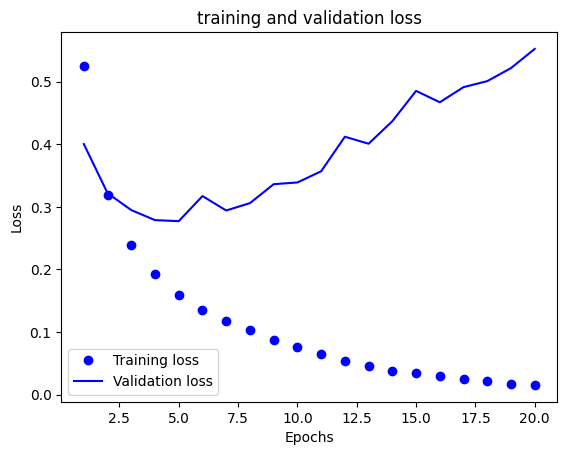

In [10]:
# plotting the training and validation loss and accuracy

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

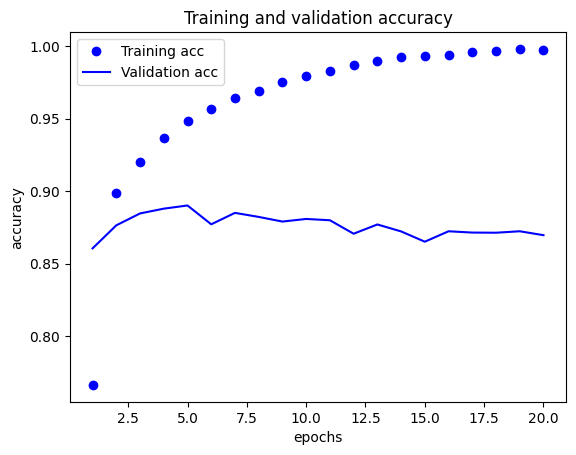

In [11]:
# plotting the train.. and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

<!-- warned thing that  -->
a model that performs better on the training data isn't necessarily a model that will
do better on data it has never seen before, example of overfitting, after the fourth epoch, we are 
overoptimizing on the training data and it gets ended up learning representations that are specific to the training data and don't generalize to data outside of the training set

we can stop training after four epochs in this case to avoid overfitting.

In [12]:
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7348 - loss: 0.5816
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8885 - loss: 0.3327
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9148 - loss: 0.2436
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9302 - loss: 0.1984
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8881 - loss: 0.2777


In [13]:
#  trained model use to generate predictions on new data

model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23910317],
       [0.9991133 ],
       [0.86114806],
       ...,
       [0.10742492],
       [0.08624188],
       [0.48443696]], dtype=float32)

In [19]:
# experiments

# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7387 - loss: 0.1762
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8966 - loss: 0.0804
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9212 - loss: 0.0609
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9367 - loss: 0.0501
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8772 - loss: 0.0919


<!-- take away from example -->
 ---need to do quite a bit of preproessing on raw data in order to be able to feed it - as tensors - into a NN.
 Sequences of words can be encoded as binary vectors but there are other encoding options too.

 ---stacks of dense layers with relu activations can solve a wide range of problems

 ---in a binary classification problem(two output classes), model should end with a Dense layer with one unit and a sigmoid activation: the output of model should be a scalar between 0 and 1, encoding a probability

 ---for such a scalar sigmoid output on a binary classification problem, the loss function : binary_crossentropy

 ---the rmsprop optimizer is good enough choice for all our problems

 ---overfitting problem, always monitor performance on data that is outside of training set.

In [20]:
# classifying newswires: A multiclass classification example, single-label multiclass classification and multilabel multiclass classification

# The Reuters dataset, 

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step


In [23]:
print(len(train_data))

print(len(test_data))

train_data[10]

8982
2246


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [24]:
# decoding newswires back to text

word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)

decoded_newswire

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [25]:
# preparing the data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# to vectorize the labels, two possibilities, can cast the label list as an integer tensor or can use one hot encoding
# one hot encoding - categorical encoding

# encoding the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [26]:
print(y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
# built in way in Keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [28]:
print(y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# building the model
# in this example we have classes of number 46, the dimensionality of the output space is much larger
# in previous example, each layer can only access information present in the output of the previous layer
# if one layer drops some info relevant to the classification problem, this info can never be recovered by latter layers
# each layer can potentially become an information bottleneck

# model defn
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# things to note in this architecture, model end with a Dense layer of size 46, for each input
# sample, the network will output a 46 dim vector, each entry in this vector will encode a different output class
# second, the last layer uses a softmax activation, means the model will output a probability distribution over the 46 different output classes

# best loss function to use in this case is categorical_crossentropy measures the distance between two 
# probability distributions, here between the probability dist output by the model and the true dist of the labels
# by minimizing the distance between these two, we train the model to output something as close as possible to the true fields



In [30]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [31]:
# setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [32]:
# model train
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.3970 - loss: 3.1954 - val_accuracy: 0.5970 - val_loss: 1.8679
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6470 - loss: 1.6987 - val_accuracy: 0.6960 - val_loss: 1.4168
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7350 - loss: 1.2448 - val_accuracy: 0.7260 - val_loss: 1.2322
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7831 - loss: 1.0108 - val_accuracy: 0.7710 - val_loss: 1.1004
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8216 - loss: 0.8424 - val_accuracy: 0.7790 - val_loss: 1.0244
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8545 - loss: 0.6685 - val_accuracy: 0.7950 - val_loss: 0.9678
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8749 - loss: 0.5791 - val_accuracy: 0.8150 - val_loss: 0.9108
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8929 - loss: 0.4830 - val_accuracy: 0.8020 - v

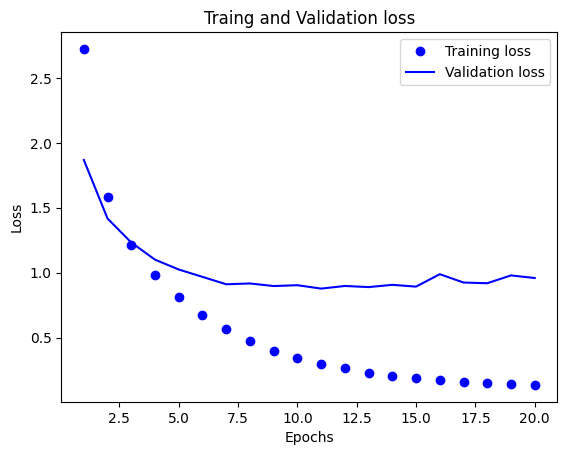

In [33]:
# plotting the train and val loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Traing and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

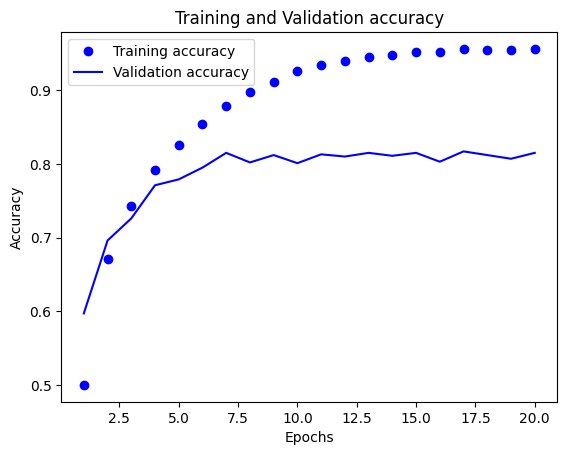

In [34]:
# plotting the training and validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [35]:
# retraining for 9 epochs as above starts overfitting after 9 epochs
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3697 - loss: 3.1151
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6671 - loss: 1.5617
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7473 - loss: 1.1761
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7900 - loss: 0.9620
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8318 - loss: 0.7875
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8610 - loss: 0.6550
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8886 - loss: 0.5367
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9097 - loss: 0.4338
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9177 - loss: 0.3934
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8001 - loss: 0.9044


[0.9306576251983643, 0.7925200462341309]

In [ ]:


import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()